In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('../titanic.csv')

In [3]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [5]:
import missingno as msno

<AxesSubplot:>

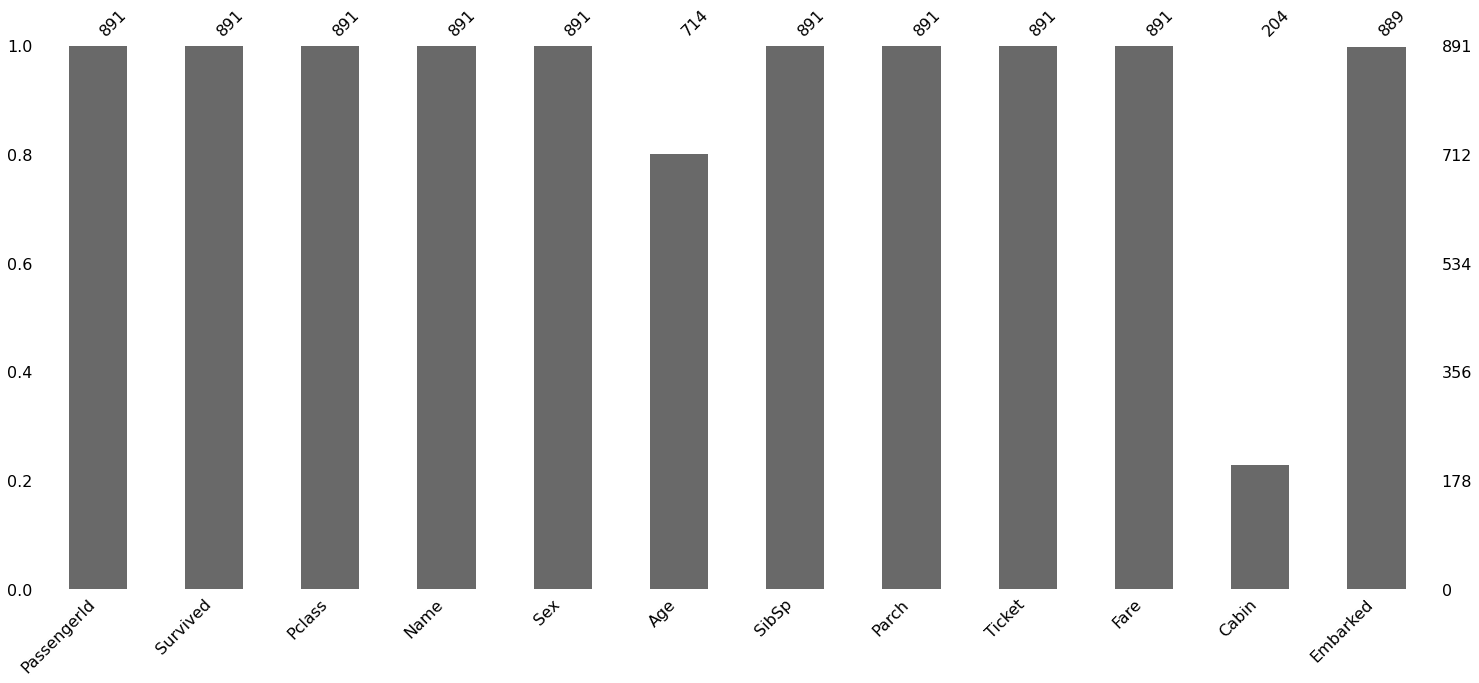

In [6]:
msno.bar(data_df)

### Deck 데이터 추출

Cabin 데이터 중 결측치 제거하여 Deck 데이터 추출

In [7]:
from collections import Counter

In [8]:
Counter(data_df['Cabin'])

Counter({nan: 687,
         'C85': 1,
         'C123': 2,
         'E46': 1,
         'G6': 4,
         'C103': 1,
         'D56': 1,
         'A6': 1,
         'C23 C25 C27': 4,
         'B78': 1,
         'D33': 2,
         'B30': 1,
         'C52': 2,
         'B28': 2,
         'C83': 2,
         'F33': 3,
         'F G73': 2,
         'E31': 1,
         'A5': 1,
         'D10 D12': 1,
         'D26': 2,
         'C110': 1,
         'B58 B60': 2,
         'E101': 3,
         'F E69': 1,
         'D47': 1,
         'B86': 1,
         'F2': 3,
         'C2': 2,
         'E33': 2,
         'B19': 1,
         'A7': 1,
         'C49': 1,
         'F4': 2,
         'A32': 1,
         'B4': 1,
         'B80': 1,
         'A31': 1,
         'D36': 2,
         'D15': 1,
         'C93': 2,
         'C78': 2,
         'D35': 2,
         'C87': 1,
         'B77': 2,
         'E67': 2,
         'B94': 1,
         'C125': 2,
         'C99': 1,
         'C118': 1,
         'D7': 1,
         'A19'

In [9]:
cabin_not_null = data_df['Cabin'].dropna()

In [10]:
cabin_not_null

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [11]:
cabin_cap = cabin_not_null.apply(lambda x : x[0])

In [12]:
cabin_cap

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object

In [13]:
Counter(cabin_cap)

Counter({'C': 59, 'E': 32, 'G': 4, 'D': 33, 'A': 15, 'B': 47, 'F': 13, 'T': 1})

In [14]:
t_deck_index = cabin_cap[cabin_cap == 'T'].index[0]

In [15]:
del cabin_cap[t_deck_index]

### Label Encounter 적용

In [16]:
from sklearn import preprocessing

In [17]:
deck_label_encoder = preprocessing.LabelEncoder()

In [18]:
list(Counter(cabin_cap).keys())

['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [19]:
deck_label_encoder.fit(list(Counter(cabin_cap).keys()))

LabelEncoder()

In [20]:
deck_data = deck_label_encoder.transform(cabin_cap)

In [21]:
deck_data

array([2, 2, 4, 6, 2, 3, 0, 2, 1, 3, 1, 2, 1, 2, 5, 5, 2, 4, 0, 3, 3, 2,
       1, 4, 3, 5, 3, 2, 1, 5, 2, 4, 1, 0, 2, 5, 0, 5, 1, 1, 6, 0, 3, 3,
       2, 2, 2, 3, 6, 2, 1, 4, 1, 2, 2, 2, 3, 0, 1, 3, 2, 2, 1, 4, 2, 2,
       4, 2, 1, 2, 4, 2, 3, 1, 2, 2, 2, 4, 5, 2, 5, 2, 4, 3, 1, 4, 2, 1,
       3, 6, 2, 4, 2, 4, 1, 2, 0, 2, 2, 2, 4, 3, 4, 4, 3, 0, 1, 2, 1, 2,
       3, 2, 1, 2, 4, 3, 5, 1, 1, 2, 1, 1, 1, 2, 2, 0, 4, 2, 4, 4, 2, 0,
       4, 1, 3, 0, 2, 5, 3, 3, 3, 0, 1, 1, 3, 0, 3, 4, 2, 1, 1, 3, 1, 1,
       2, 5, 2, 4, 4, 2, 2, 2, 5, 2, 4, 4, 1, 1, 3, 2, 1, 1, 3, 4, 1, 1,
       3, 4, 5, 1, 1, 3, 1, 3, 1, 0, 4, 1, 1, 4, 1, 4, 2, 2, 3, 4, 3, 0,
       3, 1, 2, 1, 2])

In [22]:
len(deck_data)

203

In [23]:
list(cabin_cap.index)

[1,
 3,
 6,
 10,
 11,
 21,
 23,
 27,
 31,
 52,
 54,
 55,
 61,
 62,
 66,
 75,
 88,
 92,
 96,
 97,
 102,
 110,
 118,
 123,
 124,
 128,
 136,
 137,
 139,
 148,
 151,
 166,
 170,
 174,
 177,
 183,
 185,
 193,
 194,
 195,
 205,
 209,
 215,
 218,
 224,
 230,
 245,
 248,
 251,
 252,
 257,
 262,
 263,
 268,
 269,
 273,
 275,
 284,
 291,
 292,
 297,
 298,
 299,
 303,
 305,
 307,
 309,
 310,
 311,
 318,
 319,
 325,
 327,
 329,
 331,
 332,
 336,
 337,
 340,
 341,
 345,
 351,
 356,
 366,
 369,
 370,
 377,
 390,
 393,
 394,
 412,
 429,
 430,
 434,
 435,
 438,
 445,
 449,
 452,
 453,
 456,
 457,
 460,
 462,
 473,
 475,
 484,
 486,
 487,
 492,
 496,
 498,
 504,
 505,
 512,
 515,
 516,
 520,
 523,
 527,
 536,
 539,
 540,
 544,
 550,
 556,
 558,
 571,
 572,
 577,
 581,
 583,
 585,
 587,
 591,
 599,
 609,
 618,
 621,
 625,
 627,
 630,
 632,
 641,
 645,
 647,
 659,
 662,
 669,
 671,
 679,
 681,
 689,
 690,
 698,
 699,
 700,
 701,
 707,
 710,
 711,
 712,
 715,
 716,
 717,
 724,
 730,
 737,
 740,
 741,
 74

### Deck data 준비

In [24]:
deck_X = data_df.loc[list(data_df['Cabin'].dropna().index)][['Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']]
deck_X

,Pclass,SibSp,Parch,Fare,Embarked
1,1,1,0,71.2833,C
3,1,1,0,53.1000,S
6,1,0,0,51.8625,S
10,3,1,1,16.7000,S
11,1,0,0,26.5500,S
...,...,...,...,...,...
871,1,1,1,52.5542,S
872,1,0,0,5.0000,S
879,1,0,1,83.1583,C
887,1,0,0,30.0000,S


In [25]:
embarked_label_encoder = preprocessing.LabelEncoder()
embarked_label_encoder.fit(deck_X['Embarked'])
deck_X['Embarked'] = embarked_label_encoder.transform(deck_X['Embarked'])

In [26]:
deck_X.drop(t_deck_index)

,Pclass,SibSp,Parch,Fare,Embarked
1,1,1,0,71.2833,0
3,1,1,0,53.1000,2
6,1,0,0,51.8625,2
10,3,1,1,16.7000,2
11,1,0,0,26.5500,2
...,...,...,...,...,...
871,1,1,1,52.5542,2
872,1,0,0,5.0000,2
879,1,0,1,83.1583,0
887,1,0,0,30.0000,2


In [27]:
deck_X = np.array(deck_X.drop(t_deck_index))
deck_X

array([[ 1.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 1.    ,  1.    ,  0.    , 53.1   ,  2.    ],
       [ 1.    ,  0.    ,  0.    , 51.8625,  2.    ],
       ...,
       [ 1.    ,  0.    ,  1.    , 83.1583,  0.    ],
       [ 1.    ,  0.    ,  0.    , 30.    ,  2.    ],
       [ 1.    ,  0.    ,  0.    , 30.    ,  0.    ]])

In [28]:
len(deck_X)

203

### Train / Test 분리

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(deck_X, deck_data, random_state=2, stratify=deck_data)

### 모델 객체 생성

In [1]:
from sklearn import neighbors, cluster, svm

In [32]:
knn_model = neighbors.KNeighborsClassifier(1)
kmeans_model = cluster.KMeans(n_clusters=8)
svm_model = svm.LinearSVC()

### 모델 객체 학습

In [33]:
knn_model.fit(X_train, y_train)
kmeans_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

LinearSVC()

### 모델 테스트

In [34]:
print(knn_model.predict(X_test))
print(knn_model.score(X_test, y_test))

[6 0 2 3 0 2 1 1 5 2 3 2 1 1 2 0 3 2 4 4 1 2 5 1 2 2 1 3 2 3 2 1 1 1 5 1 2
 1 5 2 4 2 1 3 4 2 4 5 2 2 2]
0.6862745098039216


In [35]:
print(kmeans_model.predict(X_test))
print(kmeans_model.score(X_test, y_test))

[0 5 5 2 0 0 5 3 0 5 2 2 1 2 5 5 2 0 5 0 0 5 5 2 4 4 5 5 0 0 6 5 6 0 0 7 2
 2 0 4 0 0 2 2 0 0 2 0 2 7 7]
-4361.8209432746025


In [36]:
print(svm_model.predict(X_test))
print(svm_model.score(X_test, y_test))

[5 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 4 3 5 3 3 3 3 3 3 3 3 3 3 4 4 3 3
 3 5 3 5 3 3 3 5 3 3 5 3 3 3]
0.19607843137254902


### Over-sampling

204개의 데이터는 약간 모자라므로 T덱을 제거 후 over-sampling

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(k_neighbors=1)

In [39]:
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [40]:
len(X_train_over)

308

### 새 데이터로 학습 & 테스트

In [41]:
knn_model.fit(X_train_over, y_train_over)
kmeans_model.fit(X_train_over, y_train_over)
svm_model.fit(X_train_over, y_train_over)

print(knn_model.predict(X_test))
print(knn_model.score(X_test, y_test))

print()

print(kmeans_model.predict(X_test))
print(kmeans_model.score(X_test, y_test))

print()

print(svm_model.predict(X_test))
print(svm_model.score(X_test, y_test))

[6 0 2 3 1 1 1 1 5 2 3 2 1 1 2 0 3 2 4 4 1 2 5 1 2 2 1 3 2 3 2 1 1 1 5 1 2
 1 1 2 4 2 1 3 4 2 4 4 2 2 2]
0.6666666666666666

[0 7 7 2 5 5 7 3 0 7 2 2 1 2 7 5 2 5 7 5 0 7 5 2 4 4 7 5 5 5 6 7 6 0 0 4 2
 2 5 4 0 5 2 2 0 5 2 0 2 4 4]
-3705.0184051725882

[5 5 5 1 5 0 5 1 5 5 1 5 1 5 5 5 5 5 5 5 5 5 5 1 1 5 1 5 0 5 5 5 1 5 5 1 1
 5 5 1 5 5 1 5 5 5 1 5 5 1 5]
0.17647058823529413


### Gradient Boosting & Cross Validation

In [42]:
from sklearn import model_selection, ensemble

In [43]:
def create_gb_model():
    
    model = ensemble.GradientBoostingClassifier(n_estimators=1000, 
                                            max_depth=4, 
                                            min_samples_split=5, 
                                            learning_rate=0.01,
                                            random_state=42)
    return model

In [44]:
model = create_gb_model()
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=2)

valid_scores_kf = model_selection.cross_val_score(model, deck_X, deck_data,
                                                  cv=kf, verbose=1, n_jobs=-1)

model = create_gb_model()
stratified_kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

valid_scores_s_kf = model_selection.cross_val_score(model, deck_X, deck_data,
                                                    cv=stratified_kf, verbose=1, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.5s finished


In [45]:
print('Cross-Validation Score (K-Fold): {:.2f}%'.format(np.mean(valid_scores_kf * 100)))
print('Cross-Validation Score (Stratified K-Fold): {:.2f}%'.format(np.mean(valid_scores_s_kf * 100)))

Cross-Validation Score (K-Fold): 68.05%
Cross-Validation Score (Stratified K-Fold): 63.02%
